In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("updated_dataset.csv")
data

,date,title,rating,body,y,cleaned_reviews
0,Reviewed in India on 1 April 2021,Good one but not worth the price tag,3.0,what i like most 1 heart beat tracking excell...,1,like heart beat track excel spo excel batteri ...
1,Reviewed in India on 24 March 2021,REDUCULOUS,1.0,not proper working and touch pad is reduculas ...,0,proper work touch pad reducula bad perfom prou...
2,Reviewed in India on 26 April 2021,Thi product is very helpfuly.,4.0,this product is bestbattery life 78days heart ...,2,product bestbatteri life day heart rate sensor...
3,Reviewed in India on 29 April 2021,Wrist band cause severe skin rashes,1.0,the watch is okay okay but the wrist band is p...,0,watch okay okay wrist band pathet got sever sk...
4,Reviewed in India on 17 April 2021,Waste of money and no return policy,1.0,dont waste you money in buying this its very m...,0,dont wast money buy much cheap qualiti product...
...,...,...,...,...,...,...
9435,Reviewed in India on 19 April 2021,Great watch but not for fitness.,2.0,i bought this watch with extremely high expect...,0,bought watch extrem high expect consid hype ar...
9436,Reviewed in India on 9 June 2021,Stay away from realme watch s,1.0,its just a fitness tracker with bigger dial wh...,0,fit tracker bigger dial doesnt get job doneif ...
9437,Reviewed in India on 2 April 2021,Return pleases,5.0,products was good per not useful sorry i am re...,2,product good per use sorri return item
9438,Reviewed in India on 1 June 2021,Buy for looks only,3.0,i posted same comment on realme community post...,1,post comment realm commun postwatch look good ...


In [3]:
# Changes the overall category to categorical from numerical for easier visualizations
data["classes"] = data["rating"]
data["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
data["classes"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [4]:
data['classes'].value_counts()

negative    5664
neutral     1888
positive    1888
Name: classes, dtype: int64

In [5]:
data

,date,title,rating,body,y,cleaned_reviews,classes
0,Reviewed in India on 1 April 2021,Good one but not worth the price tag,3.0,what i like most 1 heart beat tracking excell...,1,like heart beat track excel spo excel batteri ...,neutral
1,Reviewed in India on 24 March 2021,REDUCULOUS,1.0,not proper working and touch pad is reduculas ...,0,proper work touch pad reducula bad perfom prou...,negative
2,Reviewed in India on 26 April 2021,Thi product is very helpfuly.,4.0,this product is bestbattery life 78days heart ...,2,product bestbatteri life day heart rate sensor...,positive
3,Reviewed in India on 29 April 2021,Wrist band cause severe skin rashes,1.0,the watch is okay okay but the wrist band is p...,0,watch okay okay wrist band pathet got sever sk...,negative
4,Reviewed in India on 17 April 2021,Waste of money and no return policy,1.0,dont waste you money in buying this its very m...,0,dont wast money buy much cheap qualiti product...,negative
...,...,...,...,...,...,...,...
9435,Reviewed in India on 19 April 2021,Great watch but not for fitness.,2.0,i bought this watch with extremely high expect...,0,bought watch extrem high expect consid hype ar...,negative
9436,Reviewed in India on 9 June 2021,Stay away from realme watch s,1.0,its just a fitness tracker with bigger dial wh...,0,fit tracker bigger dial doesnt get job doneif ...,negative
9437,Reviewed in India on 2 April 2021,Return pleases,5.0,products was good per not useful sorry i am re...,2,product good per use sorri return item,positive
9438,Reviewed in India on 1 June 2021,Buy for looks only,3.0,i posted same comment on realme community post...,1,post comment realm commun postwatch look good ...,neutral


In [6]:
data.isna().sum()

date               0
title              0
rating             0
body               0
y                  0
cleaned_reviews    0
classes            0
dtype: int64

In [7]:
data

,date,title,rating,body,y,cleaned_reviews,classes
0,Reviewed in India on 1 April 2021,Good one but not worth the price tag,3.0,what i like most 1 heart beat tracking excell...,1,like heart beat track excel spo excel batteri ...,neutral
1,Reviewed in India on 24 March 2021,REDUCULOUS,1.0,not proper working and touch pad is reduculas ...,0,proper work touch pad reducula bad perfom prou...,negative
2,Reviewed in India on 26 April 2021,Thi product is very helpfuly.,4.0,this product is bestbattery life 78days heart ...,2,product bestbatteri life day heart rate sensor...,positive
3,Reviewed in India on 29 April 2021,Wrist band cause severe skin rashes,1.0,the watch is okay okay but the wrist band is p...,0,watch okay okay wrist band pathet got sever sk...,negative
4,Reviewed in India on 17 April 2021,Waste of money and no return policy,1.0,dont waste you money in buying this its very m...,0,dont wast money buy much cheap qualiti product...,negative
...,...,...,...,...,...,...,...
9435,Reviewed in India on 19 April 2021,Great watch but not for fitness.,2.0,i bought this watch with extremely high expect...,0,bought watch extrem high expect consid hype ar...,negative
9436,Reviewed in India on 9 June 2021,Stay away from realme watch s,1.0,its just a fitness tracker with bigger dial wh...,0,fit tracker bigger dial doesnt get job doneif ...,negative
9437,Reviewed in India on 2 April 2021,Return pleases,5.0,products was good per not useful sorry i am re...,2,product good per use sorri return item,positive
9438,Reviewed in India on 1 June 2021,Buy for looks only,3.0,i posted same comment on realme community post...,1,post comment realm commun postwatch look good ...,neutral


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

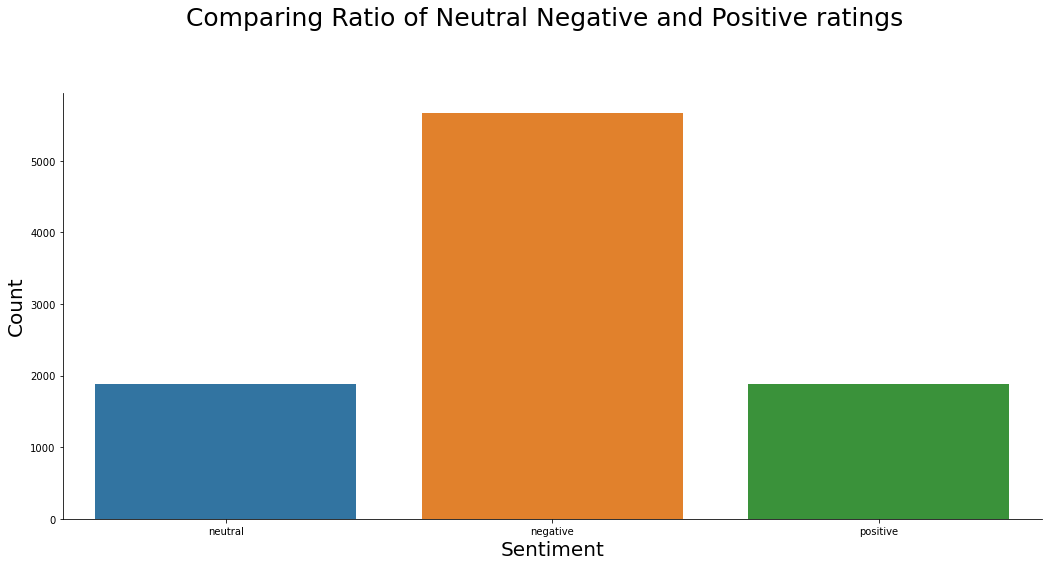

In [9]:
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = data)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [10]:
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100

In [11]:
print(f"Percentage of neutral words  {pert_count(data, 'neutral')} %")
print(f"Percentage of negative words  {pert_count(data, 'negative')} %")
print(f"Percentage of positive words  {pert_count(data, 'positive')} %")

Percentage of neutral words  20.0 %
Percentage of negative words  60.0 %
Percentage of positive words  20.0 %


In [12]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [14]:
# seperating all records into a different variable to generate wordcloud based on category
neu=data[data["classes"] == "neutral"]["cleaned_reviews"]
neg=data[data["classes"] == "negative"]["cleaned_reviews"]
pos=data[data["classes"] == "positive"]["cleaned_reviews"]

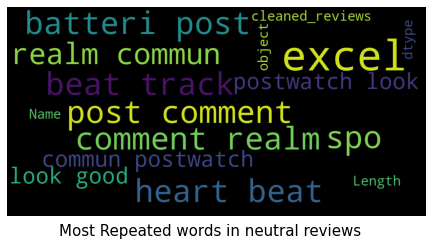

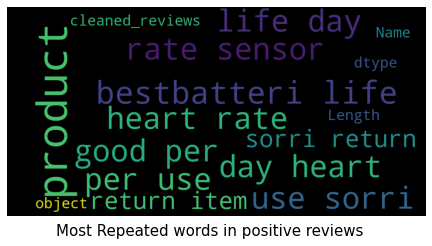

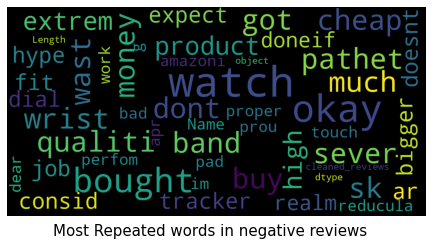

In [15]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [17]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

C:\Users\vinis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vinis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vinis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


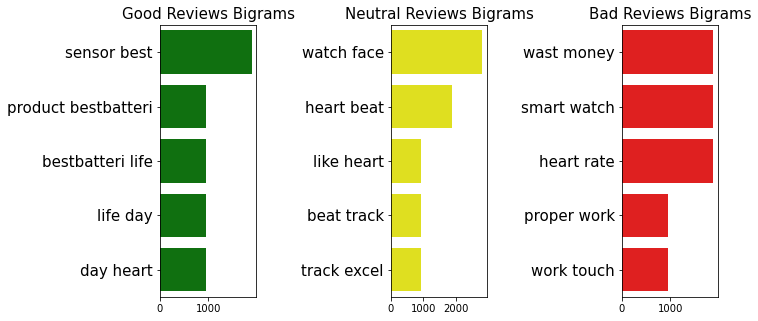

In [18]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# bigram plot using function above
plt.figure(figsize=(10,5))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')

#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')

#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')
plt.show()

In [19]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


###### Calculating sentiment polarity

In [20]:
from textblob import TextBlob
data['sentiment'] = data['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data.head()

,date,title,rating,body,y,cleaned_reviews,classes,sentiment
0,Reviewed in India on 1 April 2021,Good one but not worth the price tag,3.0,what i like most 1 heart beat tracking excell...,1,like heart beat track excel spo excel batteri ...,neutral,0.320000
1,Reviewed in India on 24 March 2021,REDUCULOUS,1.0,not proper working and touch pad is reduculas ...,0,proper work touch pad reducula bad perfom prou...,negative,-0.350000
2,Reviewed in India on 26 April 2021,Thi product is very helpfuly.,4.0,this product is bestbattery life 78days heart ...,2,product bestbatteri life day heart rate sensor...,positive,1.000000
3,Reviewed in India on 29 April 2021,Wrist band cause severe skin rashes,1.0,the watch is okay okay but the wrist band is p...,0,watch okay okay wrist band pathet got sever sk...,negative,-0.033333
4,Reviewed in India on 17 April 2021,Waste of money and no return policy,1.0,dont waste you money in buying this its very m...,0,dont wast money buy much cheap qualiti product...,negative,0.105556


In [21]:
data['sentiment'].value_counts()

 0.320000    944
-0.350000    944
 1.000000    944
-0.033333    944
 0.105556    944
 0.268571    944
 0.278571    944
 0.700000    944
 0.011667    944
 0.000000    944
Name: sentiment, dtype: int64

In [22]:
data['rating'].value_counts()

1.0    4720
3.0    1888
4.0     944
2.0     944
5.0     944
Name: rating, dtype: int64

In [23]:
944*10

9440

###### visualize the sentiment distribution

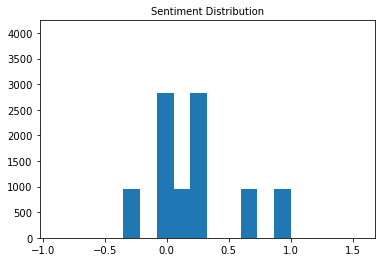

In [27]:
plt.margins(0.5)
plt.hist(data['sentiment'], bins=10)
plt.title('Sentiment Distribution', fontsize=10)
plt.show()

#### We can conclude that there's more reviews that look neutral and negative exist in our dataset than there are positive reviews. We also see that people tend to put in reviews only when its neutral or when its negative and they barely bother to put up a review when its a really good product.

C:\Users\vinis\AppData\Local\Temp/ipykernel_7696/4150715145.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot:>

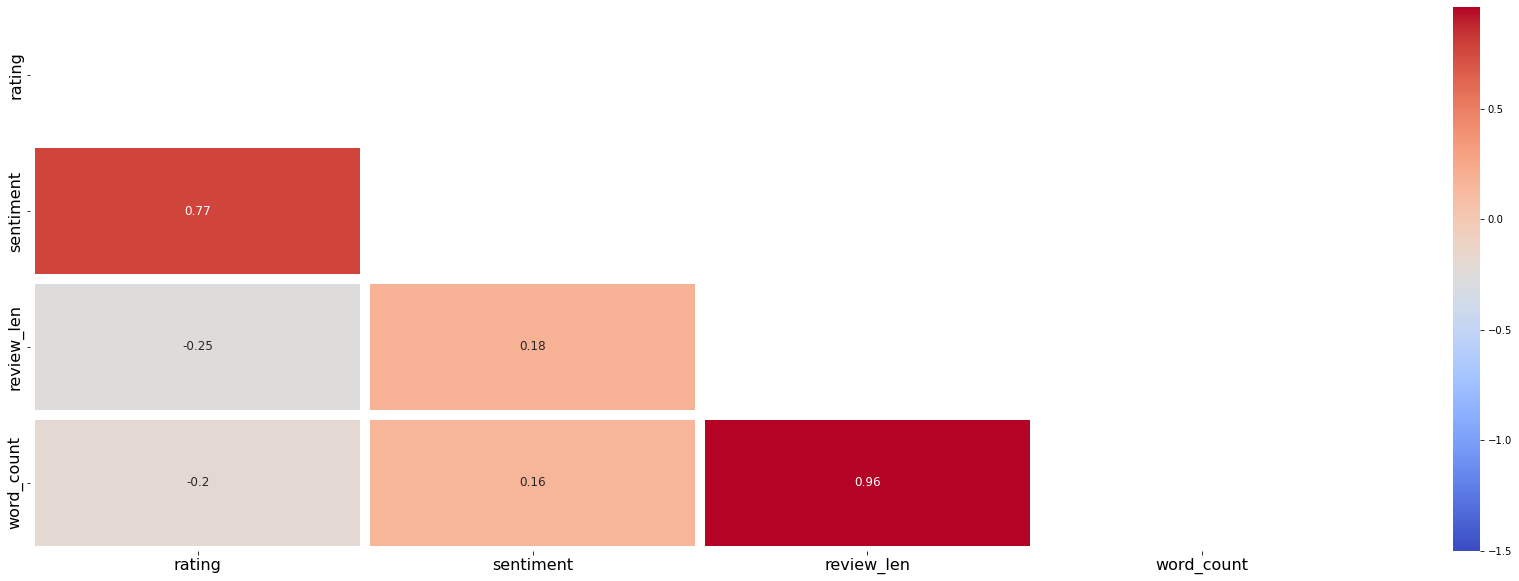

In [28]:
data['word_count'] = data["title"].apply(lambda x: len(str(x).split(" ")))
data['review_len'] =data["title"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = data[['rating','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)